<a href="https://colab.research.google.com/github/JoDeMiro/DeepLearningIntroduction/blob/main/Fun_with_NeuralNet_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kis hülyeség - Part 2

Csak egy kis móka.

MLPRegression soronként oszloponkétn n neuronnal.

Az elöző részben:

Azt láttuk, hogy nagyon lassan tanulja ráadásul rosszul becsüli a képből vett sorokat, pedig ez egy könnyű feladat lenne.

Ezért két másik módszert vizsgálunk meg.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor

In [2]:
%%capture
!rm *.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png
!wget https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png

In [3]:
import skimage.io
import skimage.transform

In [4]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

print(type(pic1))

print(pic1.shape)

red1   = pic1[:, :, 0]
green1 = pic1[:, :, 1]
blue1  = pic1[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


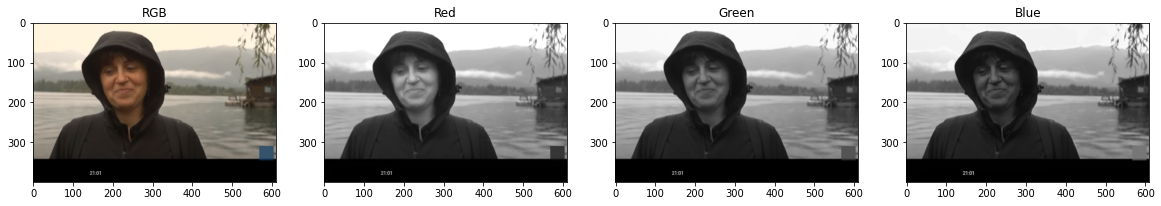

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [6]:
pic2 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

print(type(pic2))

print(pic2.shape)

red2   = pic2[:, :, 0]
green2 = pic2[:, :, 1]
blue2  = pic2[:, :, 2]

<class 'numpy.ndarray'>
(400, 610, 3)


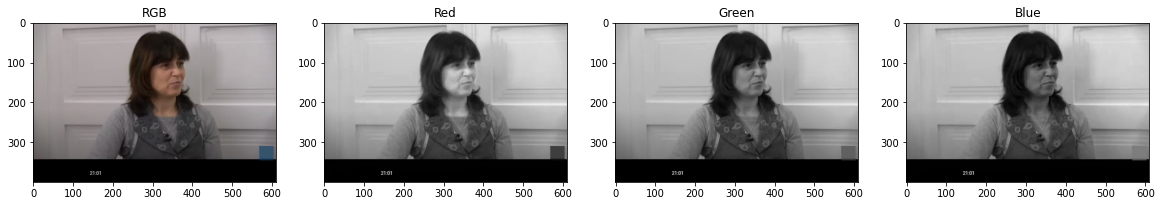

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic2, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red2, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green2, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue2, cmap='gray'); ax4.set_title('Blue')

plt.show()

In [8]:
def get_picture(file = 'https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png'):
  pic = skimage.io.imread(file)

  print(type(pic))
  print(pic.shape)

  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  return pic, red, green, blue


def show_irgb(pic):
  red   = pic[:, :, 0]
  green = pic[:, :, 1]
  blue  = pic[:, :, 2]

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('RGB')
  ax2.imshow(red, cmap='gray'); ax2.set_title('Red')
  ax3.imshow(green, cmap='gray'); ax3.set_title('Green')
  ax4.imshow(blue, cmap='gray'); ax4.set_title('Blue')

  plt.show()

def show_gray(pic):
  fig, (ax1) = plt.subplots(1, 1, figsize=(5, 8))

  ax1.imshow(pic, cmap='gray'); ax1.set_title('Gray')

  plt.show()

def crop_img(pic, x, y, w, h):
  red_   = pic[y:y+h, x:x+w, 0]
  green_ = pic[y:y+h, x:x+w, 1]
  blue_  = pic[y:y+h, x:x+w, 2]
  pic_   = pic[y:y+h, x:x+w, :]

  return pic_, red_, green_, blue_

def resize_img(pic, w, h):
  pic_ = skimage.transform.resize(pic, (w, h))

  red_   = pic_[:, :, 0]
  green_ = pic_[:, :, 1]
  blue_  = pic_[:, :, 2]

  return pic_, red_, green_, blue_

def to_gray_img(pic):

  grey_ = (pic[:, :, 0] + pic[:, :, 1] + pic[:, :, 0])/3

  return grey_


<class 'numpy.ndarray'>
(400, 610, 3)


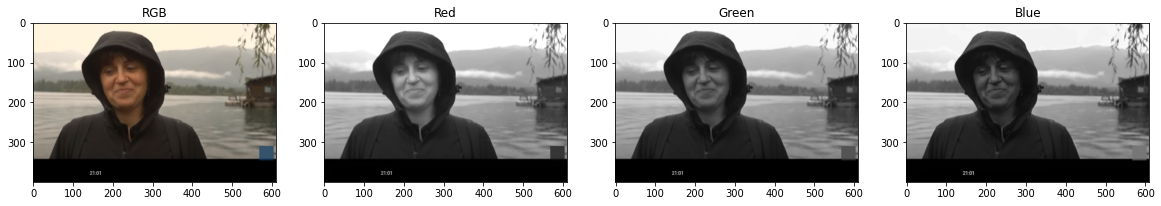

In [9]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

show_irgb(img)

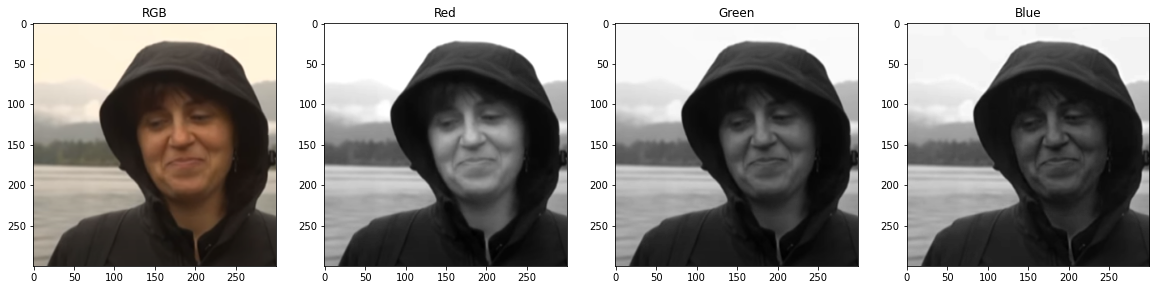

In [10]:
croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

show_irgb(croped_img)


<class 'numpy.ndarray'>
(400, 610, 3)


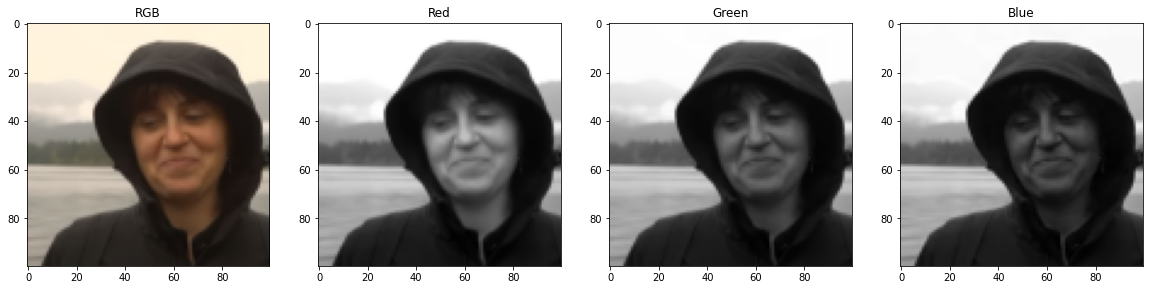

In [11]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman1 = resized_img

show_irgb(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


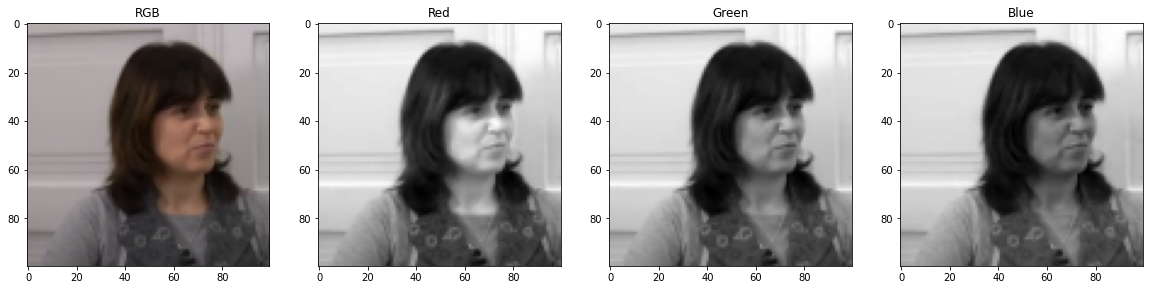

In [12]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

woman2 = resized_img

show_irgb(woman2)

<class 'numpy.ndarray'>
(400, 610, 3)


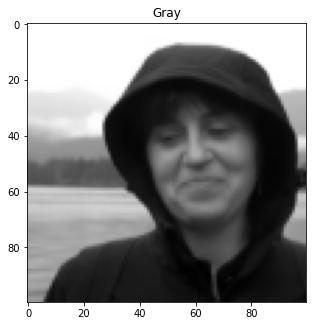

In [13]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman1.png')

croped_img, _, _, _ = crop_img(img, 40, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman1 = gray_img

show_gray(woman1)

<class 'numpy.ndarray'>
(400, 610, 3)


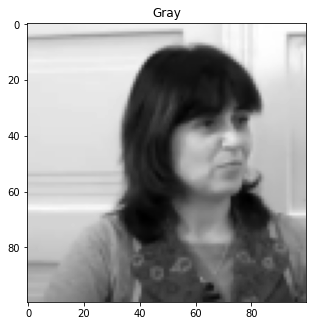

In [14]:
img, _, _, _ = get_picture('https://github.com/JoDeMiro/Data/raw/main/Images/woman2.png')

croped_img, _, _, _ = crop_img(img, 140, 0, 300, 300)

resized_img, _, _, _, = resize_img(croped_img, 100, 100)

gray_img = to_gray_img(resized_img)

woman2 = gray_img

show_gray(woman2)

# Meg van a két képem, játék.

Menjünk végig a kép sorain, és mindegyikre csináljuk egy linreg, vagy MLPRegregression illesztést. Mentsük el a becslést.

In [15]:
# A kép
# woman1

img = woman1.copy()

print(img.shape)

rows = img.shape[0]
cols = img.shape[1]

_X_indicator = np.arange(0, 1, 1/cols)
print(_X_indicator.shape)

_X_indicator = _X_indicator.reshape(-1, 1)
print(_X_indicator.shape)


(100, 100)
(100,)
(100, 1)


In [16]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
mlp = MLPRegressor(hidden_layer_sizes=(10,20),
                   activation='tanh',
                   solver='lbfgs',                  # lbfgs sokkal gyorsabban konvergál mint az adam, viszont nincs neki loss_curve_ objektuma
                   batch_size=100,
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   max_iter=17000,
                   shuffle=True,
                   random_state=1,
                   warm_start=False,
                   verbose=0,
                   validation_fraction=0.0,
                   n_iter_no_change=100000,
                   alpha=0.00000000000000001, tol=0.00000000000000001, early_stopping=True, epsilon=1e-30, max_fun=50000)


No handles with labels found to put in legend.


(2, 100)
(1, 100)
MSE =  0.0003953233207851125


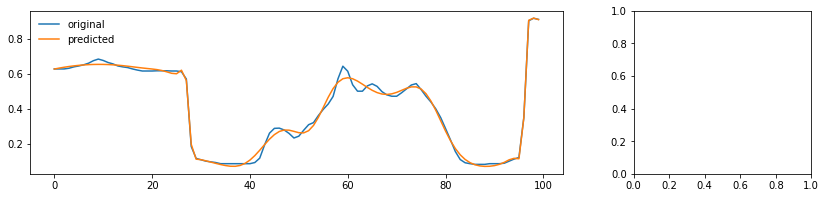

In [83]:
# Megvan a model, tanítsuk fel és kérjük le a súlyokat

# Nézzük meg elöször csak egy soron keresztül

_result = np.zeros((1, 100))

_y = img[42, :]

mlp.fit(_X_indicator, _y)
_predicted = mlp.predict(_X_indicator)
_result = np.vstack((_result, _predicted))
print(_result.shape)
_result = _result[1:, :]
print(_result.shape)
mse = mean_squared_error(_y, _predicted)
print('MSE = ', mse)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})
a0.plot(_y, label = 'original')
a0.plot(_predicted, label = 'predicted')
a0.legend(frameon=False)
# a1.plot(mlp.loss_curve_, label = 'loss')
a1.legend(frameon=False)
plt.show()


# A model súlyokat alapul véve csinálunk egy Evolúciós szelekciót

A helyzet az, hogy ha programban idáig eljutottunk akkor van egy nagyon jól feltanított hálónk.

Mérjük meg, hogy mennyire jó aztán butítsuk le, hogy GA-val tudjunk rajta tanulni.

In [84]:

from copy import deepcopy


In [85]:
mlp.set_params().max_iter=1

mlp.set_params()

MLPRegressor(activation='tanh', alpha=1e-17, batch_size=100,
             early_stopping=True, epsilon=1e-30, hidden_layer_sizes=(10, 20),
             max_fun=50000, max_iter=1, n_iter_no_change=100000, random_state=1,
             solver='lbfgs', tol=1e-17, validation_fraction=0.0, verbose=0)

score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315


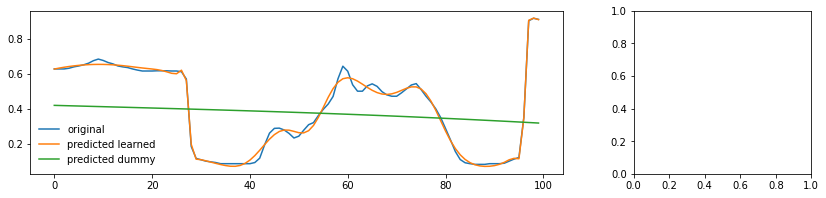

In [93]:
_pred0 = mlp.predict(_X_indicator)
_score0 = mean_squared_error(_y, _pred0)
print('score after sgd learning = ', _score0)

mlp_dummy = deepcopy(mlp)
mlp_dummy.set_params().max_iter=1
mlp_dummy.fit(_X_indicator, _y)
_pred1 = mlp_dummy.predict(_X_indicator)
_score1 = mean_squared_error(_y, _pred1)
print('score after reset the net = ', _score1)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})
a0.plot(_y, label = 'original')
a0.plot(_pred0, label = 'predicted learned')
a0.plot(_pred1, label = 'predicted dummy')
a0.legend(frameon=False)
# a1.plot(mlp.loss_curve_, label = 'loss')
# a1.legend(frameon=False)
plt.show()

In [94]:
coefs = mlp_dummy.coefs_

In [95]:
type(coefs)

list

In [96]:
len(coefs)

3

In [98]:
a = mlp_dummy.coefs_[0].copy()

a + np.random.randn(coefs[0].shape[0],coefs[0].shape[1])

array([[-3.51186507e-01,  6.73443122e-01, -2.88877524e+00,
         1.09755029e-04, -4.90868601e-01, -4.82889712e-01,
        -9.90217388e-01, -4.98592774e-01,  4.20051849e-01,
        -2.61049559e+00]])

In [102]:
# hogyan tudjuk szabályozni azt, hogy mennyire randomizálja a súlyokat

a0 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1])
a1 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1])
a2 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1]) / 10
a3 = np.random.randn(coefs[0].shape[0],coefs[0].shape[1]) / 100

print(a0)
print(a1)
print(a2)
print(a3)


[[ 1.86634118 -1.07694841 -1.40517596 -1.74552539 -0.48124832 -0.62039434
   0.64134457  0.36932925  0.09903299  0.73005412]]
[[-0.22859076 -1.31408213  1.10489054 -2.43314336  2.02664034 -0.27046304
   1.91106564 -0.04311726  1.11055229  0.25558578]]
[[ 0.14275587  0.03925212 -0.0241634   0.09399979 -0.06684813 -0.0223864
  -0.03730864  0.01172919 -0.04022219 -0.06743521]]
[[-0.00689695  0.00897713 -0.0250893  -0.01563756 -0.00731818 -0.00755691
   0.01224895 -0.01610999 -0.00251607  0.00130221]]


In [109]:
# Jól műmödik az algoritmusunk mert nem változtat a súlyokon semmit ---< Test >----

def randomizer(coefs):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    # _coefs[i] = coefs[i] + np.random.randn(coefs[i].shape[0], coefs[i].shape[1])
    _coefs[i] = coefs[i]

  return _coefs

def evolve(mlp_dummy):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = 3
  population = 10

  for i in range(generation):
    # a legjobb egyed
    best_solution = None
    best_score = 999999
    for j in range(population):
      a = randomizer(coefs)
      # print(a)
      working_mlp.coefs_ = a

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)

      # ha megvan a legjobb akkor azt tegye le a coefs változóba

    print('best_score in generation i = ', i, ' = ', best_score)


In [110]:
evolve(mlp)

i =  0 j =  0 score =  0.0003953233207851125
i =  0 j =  1 score =  0.0003953233207851125
i =  0 j =  2 score =  0.0003953233207851125
i =  0 j =  3 score =  0.0003953233207851125
i =  0 j =  4 score =  0.0003953233207851125
i =  0 j =  5 score =  0.0003953233207851125
i =  0 j =  6 score =  0.0003953233207851125
i =  0 j =  7 score =  0.0003953233207851125
i =  0 j =  8 score =  0.0003953233207851125
i =  0 j =  9 score =  0.0003953233207851125
best_score in generation i =  0  =  0.0003953233207851125
i =  1 j =  0 score =  0.0003953233207851125
i =  1 j =  1 score =  0.0003953233207851125
i =  1 j =  2 score =  0.0003953233207851125
i =  1 j =  3 score =  0.0003953233207851125
i =  1 j =  4 score =  0.0003953233207851125
i =  1 j =  5 score =  0.0003953233207851125
i =  1 j =  6 score =  0.0003953233207851125
i =  1 j =  7 score =  0.0003953233207851125
i =  1 j =  8 score =  0.0003953233207851125
i =  1 j =  9 score =  0.0003953233207851125
best_score in generation i =  1  =  0.0003

In [116]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    _ranodm_stregth = 100 # ----> nincs bekötve, majd megy a nevezőbe
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / 1000
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve(mlp_dummy):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = 3
  population = 10

  for i in range(generation):
    # a legjobb egyed
    best_solution = None
    best_score = 999999
    for j in range(population):
      a = randomizer(coefs)
      # print(a)
      working_mlp.coefs_ = a

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)

      # ha megvan a legjobb akkor azt tegye le a coefs változóba

    print('best_score in generation i = ', i, ' = ', best_score)


In [117]:
evolve(mlp)

i =  0 j =  0 score =  0.0004356157762133739
i =  0 j =  1 score =  0.000648375143745483
i =  0 j =  2 score =  0.0004993520024211346
i =  0 j =  3 score =  0.00046202550525358465
i =  0 j =  4 score =  0.000448570639706349
i =  0 j =  5 score =  0.0004945329315741043
i =  0 j =  6 score =  0.00041656848614568596
i =  0 j =  7 score =  0.00043299028676684835
i =  0 j =  8 score =  0.0004133272542988034
i =  0 j =  9 score =  0.0004827557265182789
best_score in generation i =  0  =  0.0004133272542988034
i =  1 j =  0 score =  0.0004197313769499807
i =  1 j =  1 score =  0.0005159128342169106
i =  1 j =  2 score =  0.00047780861036942886
i =  1 j =  3 score =  0.0004342204303037119
i =  1 j =  4 score =  0.00041435485517412907
i =  1 j =  5 score =  0.0005039621992093788
i =  1 j =  6 score =  0.0004434441840075103
i =  1 j =  7 score =  0.0005244599243715059
i =  1 j =  8 score =  0.0004053603704004102
i =  1 j =  9 score =  0.00041080984794028444
best_score in generation i =  1  =  0.

In [118]:
0.0003953233207851125

# Ehhez képest csak romlott

# Ennek az egyik oka, hogy tulajdonképpen az összes súlyon módosítok

0.0003953233207851125

In [121]:
# Nézzük meg, hogy a dummy mlp resetelt súlyó modellen milyen eredményeket adna.


_pred_dummy = mlp_dummy.predict(_X_indicator)
_score_dummy = mean_squared_error(_y, _pred_dummy)
print('score dummy net = ', _score_dummy)

score dummy net =  0.05238925670809315


In [122]:
# Ehhez képest kéne elérni valami javulást a randomizációval

In [123]:
evolve(mlp_dummy)

i =  0 j =  0 score =  0.05255347127319226
i =  0 j =  1 score =  0.05232082909307149
i =  0 j =  2 score =  0.05237600858910239
i =  0 j =  3 score =  0.0524931083353531
i =  0 j =  4 score =  0.052290419979904454
i =  0 j =  5 score =  0.05223142001210098
i =  0 j =  6 score =  0.05229505678079291
i =  0 j =  7 score =  0.052367480269915244
i =  0 j =  8 score =  0.05250839225332456
i =  0 j =  9 score =  0.05240506402752601
best_score in generation i =  0  =  0.05223142001210098
i =  1 j =  0 score =  0.05254029363856917
i =  1 j =  1 score =  0.05249880412606999
i =  1 j =  2 score =  0.05237349522067127
i =  1 j =  3 score =  0.05256779684537751
i =  1 j =  4 score =  0.05234938729998606
i =  1 j =  5 score =  0.05237985725668091
i =  1 j =  6 score =  0.05239092298730317
i =  1 j =  7 score =  0.05243431146921946
i =  1 j =  8 score =  0.052511984221341644
i =  1 j =  9 score =  0.052424963912195706
best_score in generation i =  1  =  0.05234938729998606
i =  2 j =  0 score =  0.

In [ ]:
# rendben úgy látszik, hogy a randomizációval sikerül úgy modosítani a súlyokat, hogy néha jobb eredményt kapjunk

# írjuk tovább az evolve függvényt, hogy generációról generációra örökítse át a legjobb modelt és azokat randomizálja




In [263]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs, random_factor):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    _ranodm_stregth = 100 # ----> nincs bekötve, majd megy a nevezőbe
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / random_factor
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve_adv1(mlp_dummy, generation = 10, population = 10, print_population = True, print_generation = (True, 1), random_factor = 1000):
  coefs = mlp_dummy.coefs_

  backup_mlp = deepcopy(mlp_dummy)
  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  population_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []
    # a legjobb egyed
    # best_mlp_solution = None # --> nem itt kel inicializálni
    best_score = 999999
    for j in range(population):
      coefs = best_mlp_solution.coefs_ # --> megkapja az éppen legjobb coeficienseit
      a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      # print(a)
      working_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_mlp_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_score)

  return generation_holder, best_score_holder, best_mlp_solution


In [247]:
generation_scores, best_scores, _ = evolve_adv1(mlp_dummy, generation = 100, print_population=False)

best_score in generation i =  0  =  0.05201675353556421
best_score in generation i =  1  =  0.05167627065072113
best_score in generation i =  2  =  0.0514378636811903
best_score in generation i =  3  =  0.05122559793351345
best_score in generation i =  4  =  0.051024339507103694
best_score in generation i =  5  =  0.050982539916037746
best_score in generation i =  6  =  0.050838788703829435
best_score in generation i =  7  =  0.05077909710527429
best_score in generation i =  8  =  0.05054385087380586
best_score in generation i =  9  =  0.05046165080742962
best_score in generation i =  10  =  0.05032511143972191
best_score in generation i =  11  =  0.05023034474762708
best_score in generation i =  12  =  0.05001961545911539
best_score in generation i =  13  =  0.04979993093257539
best_score in generation i =  14  =  0.049726411693168
best_score in generation i =  15  =  0.04964861753674511
best_score in generation i =  16  =  0.049540888147080214
best_score in generation i =  17  =  0.0

In [248]:

def plot_generation_scatter(generation_scores):

  m = np.zeros((len(generation_scores), len(generation_scores[0])))
  # print(m.shape)

  for i in range(len(generation_scores)):
    for j in range(len(generation_scores[i])):
      m[i, j] = generation_scores[i][j]

  # --- kell csinálni egy [0, 1, 2, ..., 0, 1, 2, ..., 0, 1, 2] vektort is az lesz majd az x -tengely
  n = np.arange(1, len(generation_scores) + 1, 1)
  a = []
  for _ in range(len(generation_scores[0])):
    a.append(n)
  b = np.array(a)
  c = b.flatten()

  # --- ki kell teríteni a mátrixba rakott score-okat és kész is
  s = m.flatten(order='C')
  s = m.flatten(order='F')

  # --- plot
  # plt.scatter(c, s)
  
  return c, s

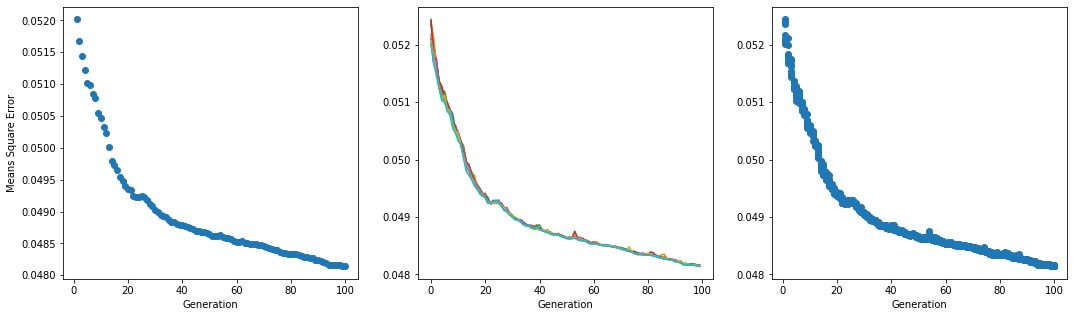

In [249]:
fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
_number_of_generation = len(best_scores)
_x_axis = np.arange(1, _number_of_generation+1, 1)
a0.scatter(_x_axis, best_scores)
a0.set_ylabel('Means Square Error')
a0.set_xlabel('Generation')

a1.plot(generation_scores)
a1.set_xlabel('Generation')

c, s = plot_generation_scatter(generation_scores)

a2.scatter(c, s)
a2.set_xlabel('Generation')
plt.show()

# Na akkor most egyben az egész, mert ez így nagyon sok

In [258]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy, generation = 5000, print_population=False, print_generation=(True, 50))

best_score in generation i =  0  =  0.05226133274763786
best_score in generation i =  50  =  0.048482660682462424
best_score in generation i =  100  =  0.04794986126766536
best_score in generation i =  150  =  0.04747082107614289
best_score in generation i =  200  =  0.047130127554697726
best_score in generation i =  250  =  0.04671198868753276
best_score in generation i =  300  =  0.04609545238858685
best_score in generation i =  350  =  0.04568804818496923
best_score in generation i =  400  =  0.04506978005788253
best_score in generation i =  450  =  0.04445598471039524
best_score in generation i =  500  =  0.043810709044470396
best_score in generation i =  550  =  0.043191855827321
best_score in generation i =  600  =  0.042771343152503735
best_score in generation i =  650  =  0.04233171806621454
best_score in generation i =  700  =  0.041993844728881416
best_score in generation i =  750  =  0.04182405097003764
best_score in generation i =  800  =  0.04174381592022467
best_score in 

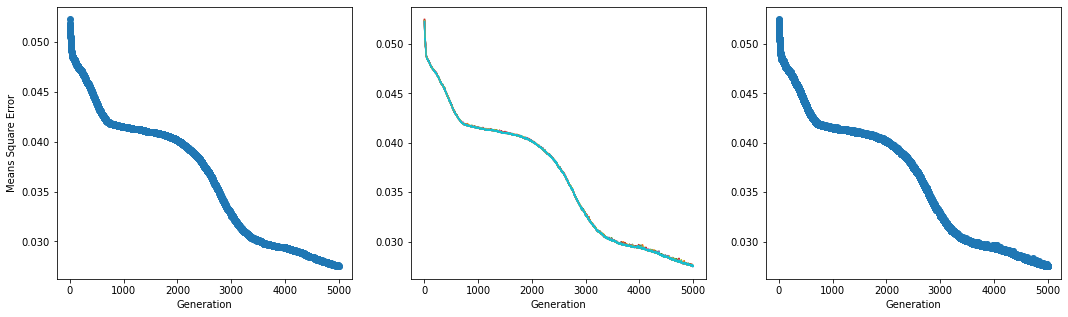

In [260]:
fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
_number_of_generation = len(best_scores)
_x_axis = np.arange(1, _number_of_generation+1, 1)
a0.scatter(_x_axis, best_scores)
a0.set_ylabel('Means Square Error')
a0.set_xlabel('Generation')

a1.plot(generation_scores)
a1.set_xlabel('Generation')

c, s = plot_generation_scatter(generation_scores)

a2.scatter(c, s)
a2.set_xlabel('Generation')
plt.show()

score after sgd learning =  0.0003953233207851125
score after reset the net =  0.05238925670809315
score after evolve the net =  0.0274910885552942


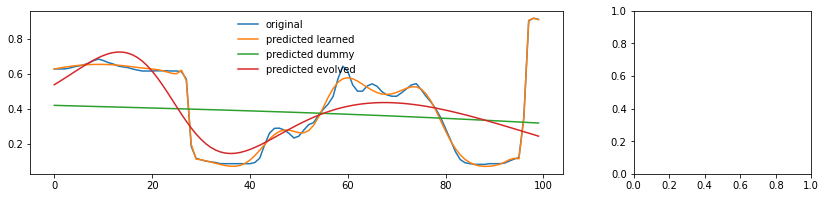

In [261]:
_pred0 = mlp.predict(_X_indicator)                        # Az eredeti SGD() feltanított mlp
_score0 = mean_squared_error(_y, _pred0)
print('score after sgd learning = ', _score0)

mlp_dummy = deepcopy(mlp)                                 # A sík hülye dummy mlp
mlp_dummy.set_params().max_iter=1
mlp_dummy.fit(_X_indicator, _y)
_pred1 = mlp_dummy.predict(_X_indicator)
_score1 = mean_squared_error(_y, _pred1)
print('score after reset the net = ', _score1)

mlp_evolved = deepcopy(best_mlp)
_pred2 = mlp_evolved.predict(_X_indicator)
_score2 = mean_squared_error(_y, _pred2)
print('score after evolve the net = ', _score2)

fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})
a0.plot(_y, label = 'original')
a0.plot(_pred0, label = 'predicted learned')
a0.plot(_pred1, label = 'predicted dummy')
a0.plot(_pred2, label = 'predicted evolved')
a0.legend(frameon=False)
# a1.plot(mlp.loss_curve_, label = 'loss')
# a1.legend(frameon=False)
plt.show()

# Ez eddig tetszik

Most játszok egy kicsit a súlyokat variáló random beállításaival

In [268]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 5000,
                                                       print_population=False,
                                                       print_generation=(True, 500), random_factor=100)

best_score in generation i =  0  =  0.05163922123521445
best_score in generation i =  500  =  0.04140845496526992
best_score in generation i =  1000  =  0.04076669688302318
best_score in generation i =  1500  =  0.039127409900630954
best_score in generation i =  2000  =  0.03407727449286451
best_score in generation i =  2500  =  0.03890938059349261
best_score in generation i =  3000  =  0.031213503628003837
best_score in generation i =  3500  =  0.04285170023965639
best_score in generation i =  4000  =  0.026977754037104583
best_score in generation i =  4500  =  0.025793225739164274
CPU times: user 40.6 s, sys: 218 ms, total: 40.8 s
Wall time: 41.4 s


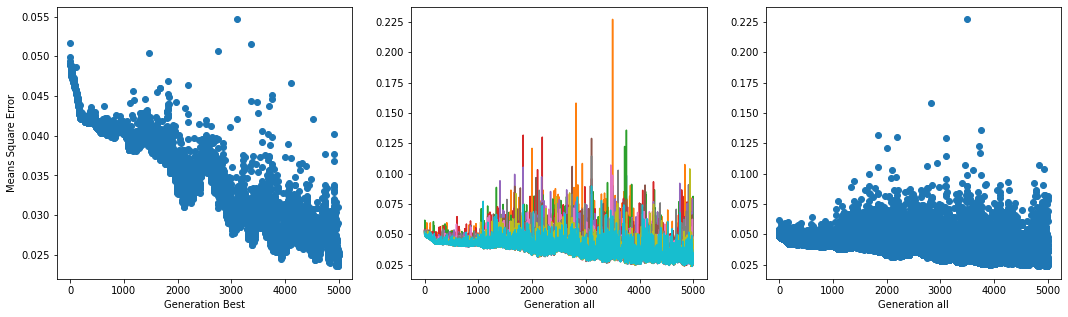

In [270]:
fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
_number_of_generation = len(best_scores)
_x_axis = np.arange(1, _number_of_generation+1, 1)
a0.scatter(_x_axis, best_scores)
a0.set_ylabel('Means Square Error')
a0.set_xlabel('Generation Best')

a1.plot(generation_scores)
a1.set_xlabel('Generation all')

c, s = plot_generation_scatter(generation_scores)

a2.scatter(c, s)
a2.set_xlabel('Generation all')
plt.show()

# Fent

Amit itt látni kell vagy látni érdemes,

Hogy mivel nem volt **keep the best** tehát nem tartjuk meg a generáció legjobbját.

Ezért előfordulhat, hogy **mutáció** vagy randomizálás után az új populációban nem lesz olyan megoldás ami jobb mint a régebbi populáció, sőt még az is lehet, hogy rosszabb értéket kapunk.

Tulajdonképpen ezt látjuk a bal oldali ábrán.

Érdkes módon viszont így is konvergál és halad az egyre jobb megoldások felé, csak elég nagy szóródással.

A jobb oldali ábrán viszont az látszik, hogy egyre nagyobb a szóródás egy egy generációban a populáció egyes tagjai között is idővel.

# Ez nagyon tetszik,

Csináljunk még néhány kíséletet a mutáció faktorának beállításaival.



```
# További ötleteim egyébként

# - Néha tanuljon rá a gradiens módszerre, azátn ismét GA módba váltson át

# - Tartsa meg a legjobbat

# - Tartsa meg a legjobbat és ne minden súlyt változtasson hanem véletleszerűen egy bizonyos mennyiséget

# - Tartsa meg a legjobbat és néha változtasson a mutáció mértékén 'random_factor'
```

## Ezt a 3 Plotter meg tegyük ki egy függvénybe



In [273]:
def plot_3_window(generation_scores, best_scores):

  fig, (a0, a1, a2) = plt.subplots(1, 3, figsize=(18, 5))
  _number_of_generation = len(best_scores)
  _x_axis = np.arange(1, _number_of_generation+1, 1)
  a0.scatter(_x_axis, best_scores)
  a0.set_ylabel('Means Square Error')
  a0.set_xlabel('Generation Best')

  a1.plot(generation_scores)
  a1.set_xlabel('Generation all')

  c, s = plot_generation_scatter(generation_scores)

  a2.scatter(c, s)
  a2.set_xlabel('Generation all')
  plt.show()


In [277]:
def plot_3_window_row(generation_scores, best_scores):

  fig, (a0, a1, a2) = plt.subplots(3, 1, figsize=(18, 15))
  _number_of_generation = len(best_scores)
  _x_axis = np.arange(1, _number_of_generation+1, 1)
  a0.scatter(_x_axis, best_scores)
  a0.set_ylabel('Means Square Error')
  a0.set_xlabel('Generation Best')

  a1.plot(generation_scores)
  a1.set_xlabel('Generation all')

  c, s = plot_generation_scatter(generation_scores)

  a2.scatter(c, s)
  a2.set_xlabel('Generation all')
  plt.show()


In [272]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 5000,
                                                       print_population=False,
                                                       print_generation=(True, 500), random_factor=500)

best_score in generation i =  0  =  0.05215863249854486
best_score in generation i =  500  =  0.042144057183399176
best_score in generation i =  1000  =  0.041152833540037514
best_score in generation i =  1500  =  0.040462529419668415
best_score in generation i =  2000  =  0.03858602158396992
best_score in generation i =  2500  =  0.03374866377945814
best_score in generation i =  3000  =  0.03057790222418852
best_score in generation i =  3500  =  0.029824025181986666
best_score in generation i =  4000  =  0.02966181082912181
best_score in generation i =  4500  =  0.028759836203889735
CPU times: user 56.3 s, sys: 238 ms, total: 56.5 s
Wall time: 1min


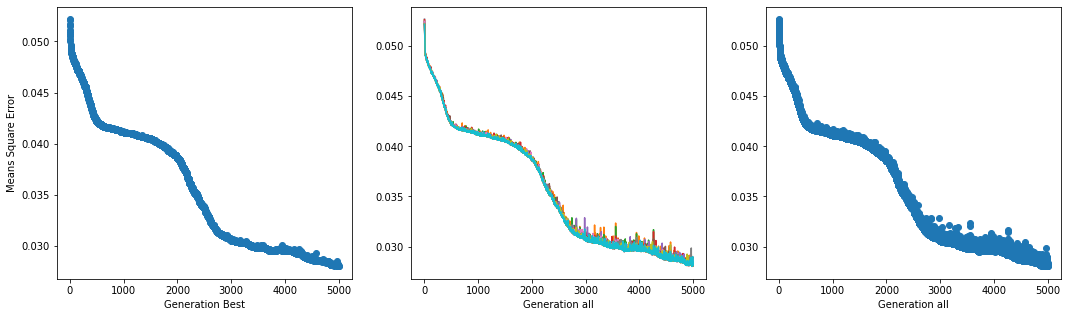

In [274]:
plot_3_window(generation_scores, best_scores)

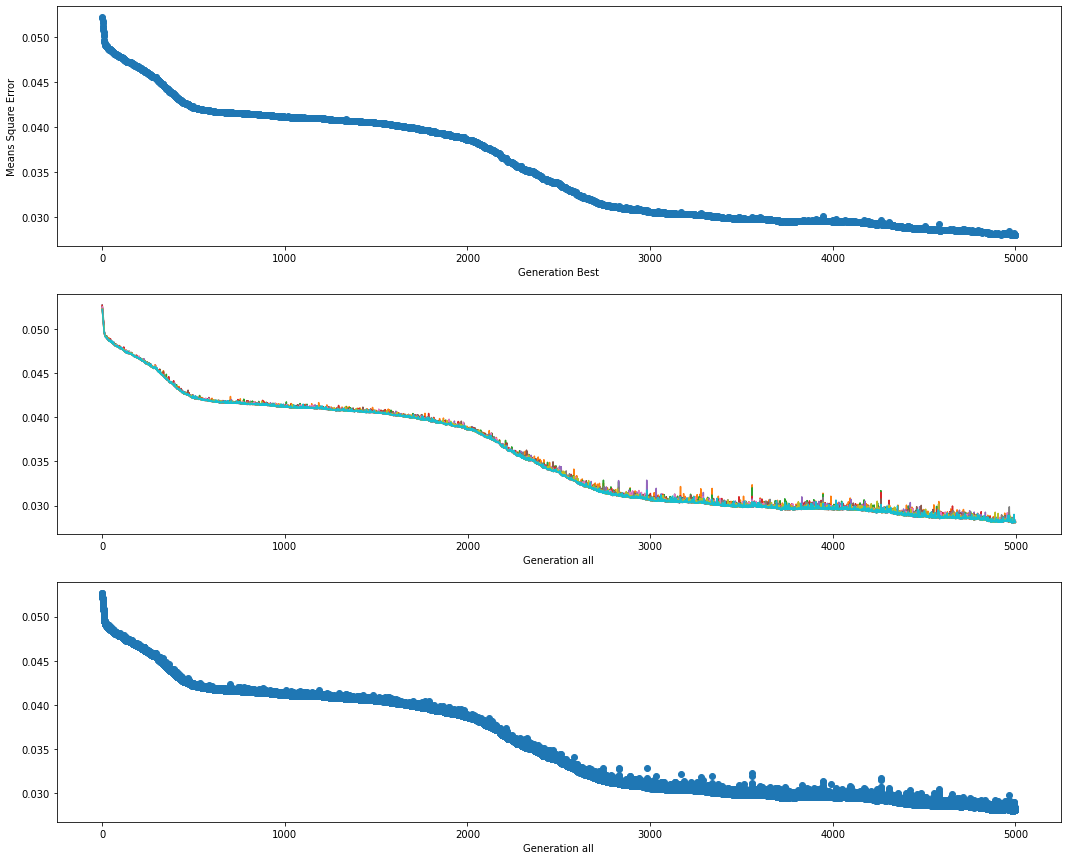

In [278]:
plot_3_window_row(generation_scores, best_scores)

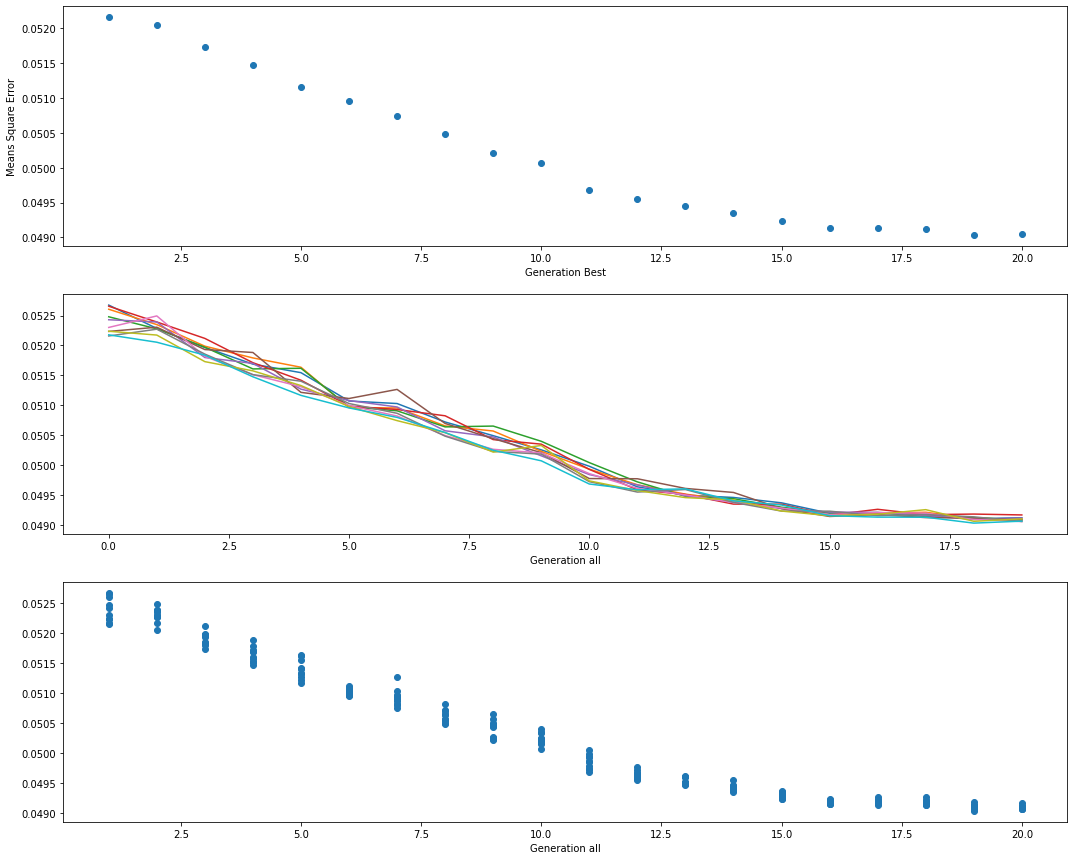

In [281]:
plot_3_window_row(generation_scores[0:20], best_scores[0:20])

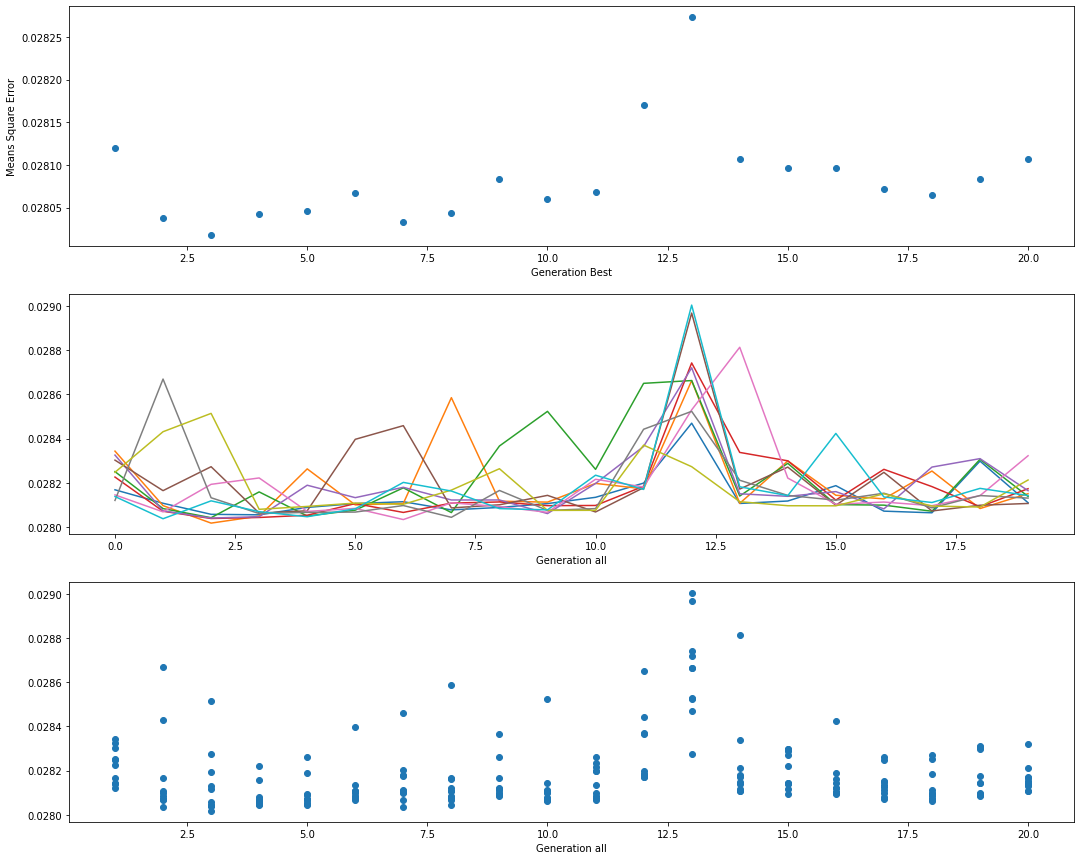

In [283]:
plot_3_window_row(generation_scores[-20:], best_scores[-20:])

# Fent

Ami látszik.

Az elejét \[0:20\] majd egy második lekérdezésben a végét \[-20:\] rajzoltattam csak ki.

A végén már nagyon ugrálnak az eredmények.

Ki kéne próbálni a **keep best** módszert is.

De elötte még hagyom, hogy jó sokáig fusson.

In [297]:
%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 20000,
                                                       print_population=False,
                                                       print_generation=(True, 500), random_factor=500)

best_score in generation i =  0  =  0.05200618476275101
best_score in generation i =  500  =  0.04244009176224396
best_score in generation i =  1000  =  0.04143611642389076
best_score in generation i =  1500  =  0.04067233164223206
best_score in generation i =  2000  =  0.03948095017993194
best_score in generation i =  2500  =  0.0359399874114569
best_score in generation i =  3000  =  0.030486339579048588
best_score in generation i =  3500  =  0.028402460415488457
best_score in generation i =  4000  =  0.026985541596565344
best_score in generation i =  4500  =  0.025479151662095426
best_score in generation i =  5000  =  0.024720460719964473
best_score in generation i =  5500  =  0.024217751337706265
best_score in generation i =  6000  =  0.02384743196660881
best_score in generation i =  6500  =  0.023433558242773364
best_score in generation i =  7000  =  0.023321437611237266
best_score in generation i =  7500  =  0.022877003604946086
best_score in generation i =  8000  =  0.02256182500

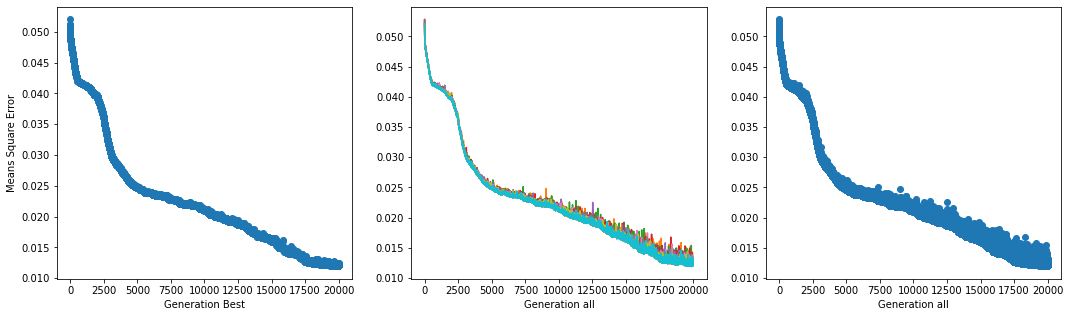

In [298]:
plot_3_window(generation_scores, best_scores)

# Irjuk meg Keep Best esetre is

In [301]:
# Nagyon kicsit változtatok a súlyokon a generációkon belül, de generációnként nincs öröklés

def randomizer(coefs, random_factor):
  _coefs = coefs.copy()
  for i in range(len(coefs)):
    _ranodm_stregth = 100 # ----> nincs bekötve, majd megy a nevezőbe
    _random_disturbance = np.random.randn(coefs[i].shape[0], coefs[i].shape[1]) / random_factor
    _coefs[i] = coefs[i] + _random_disturbance
    # _coefs[i] = coefs[i] # <--- means no change

  return _coefs

def evolve_adv2(mlp_dummy, generation = 10, population = 10, keep_best = False, print_population = True, print_generation = (True, 1), random_factor = 1000):
  coefs = mlp_dummy.coefs_

  working_mlp = deepcopy(mlp_dummy)

  generation = generation
  population = population

  best_mlp_solution = deepcopy(mlp_dummy)

  generation_holder = []
  best_indiv_holder = []
  best_score_holder = []

  for i in range(generation):

    population_holder = []
    best_indiv_holder = []
    # a legjobb egyed
    # best_mlp_solution = None # --> nem itt kel inicializálni
    best_score = 999999
    for j in range(population):
      coefs = best_mlp_solution.coefs_ # --> megkapja az éppen legjobb coeficienseit

      # --> mutáció indul minden egyes egyed esetében
      if( keep_best == True ):
        if( j == 0):
          # Ha keep_best és első elem a populációban, akor tartsa meg a régi súlyt és ne randomizáljon
          a = coefs
          pass
        else:
          a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      else:
        a = randomizer(coefs, random_factor)            # --> randomizálja a súlyokat
      # --> vége a súlymutációnak

      working_mlp.coefs_ = a           # --> hozzárendeljük a randomizált súlyokat a hálóhoz

      # számolja ki a becslést
      pred = working_mlp.predict(_X_indicator)

      # mérje vissza a hibát
      score = mean_squared_error(_y, pred)
      if( print_population ):
        print('i = ', i, 'j = ', j, 'score = ', score)

      # mindíg tartsa észbe, hogy ki volt a legjobb -> ezt tárolja le
      if( score < best_score ):
        best_score = score
        best_mlp_solution = deepcopy(working_mlp)
        # print('new best_solution find individual = ', j)
      
      # az éppen aktuális egyed score értékét tegyük el
      population_holder.append(score)

      # -----

    # generációnként tároljuk le a legjobb egyed score érétkét
    best_score_holder.append(best_score)

    # nyomonkövetés céljából tegyük le egy adott generáció összes egyedének scorját is
    generation_holder.append(population_holder)

    if( print_generation[0] ):
      if( i % print_generation[1] == 0 ):
        print('best_score in generation i = ', i, ' = ', best_score)

  return generation_holder, best_score_holder, best_mlp_solution


In [310]:
# Az új - evolve_adv2

%%time
generation_scores, best_scores, best_mlp = evolve_adv2(mlp_dummy,
                                                       generation = 200,
                                                       print_population=False,
                                                       print_generation=(True, 20), random_factor=500)

best_score in generation i =  0  =  0.051896754921056526
best_score in generation i =  20  =  0.04895436954259352
best_score in generation i =  40  =  0.04846783184296104
best_score in generation i =  60  =  0.048122360614050716
best_score in generation i =  80  =  0.047970985539013425
best_score in generation i =  100  =  0.047768113877956944
best_score in generation i =  120  =  0.047316193251297746
best_score in generation i =  140  =  0.04710931421689748
best_score in generation i =  160  =  0.04681518069870019
best_score in generation i =  180  =  0.04639107277989409
CPU times: user 1.46 s, sys: 13.8 ms, total: 1.48 s
Wall time: 1.48 s


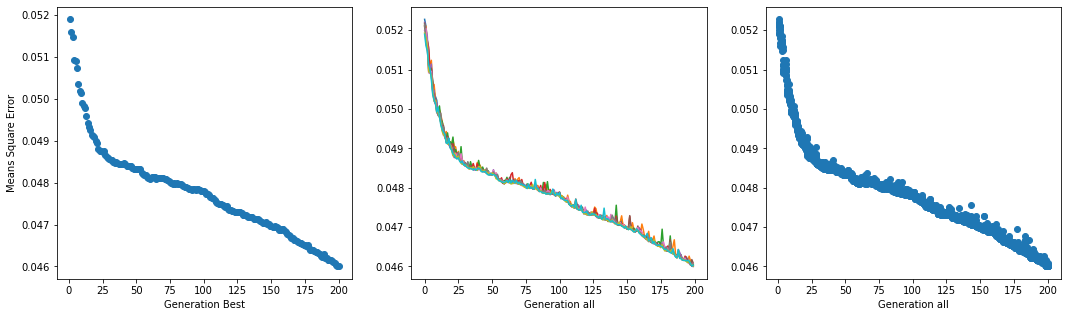

In [311]:
plot_3_window(generation_scores, best_scores)

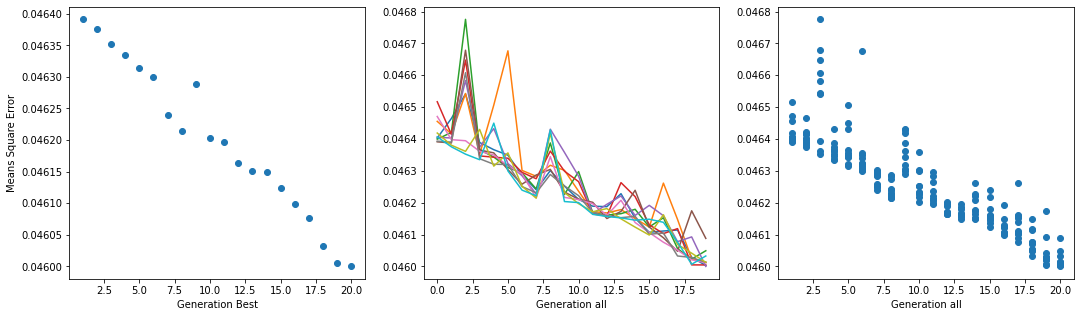

In [312]:
plot_3_window(generation_scores[-20:], best_scores[-20:])

In [313]:
# A régi - evolve_adv1

%%time
generation_scores, best_scores, best_mlp = evolve_adv1(mlp_dummy,
                                                       generation = 200,
                                                       print_population=False,
                                                       print_generation=(True, 20), random_factor=500)

best_score in generation i =  0  =  0.05158517918977277
best_score in generation i =  20  =  0.04874447241809562
best_score in generation i =  40  =  0.048443945314843063
best_score in generation i =  60  =  0.048250327103279214
best_score in generation i =  80  =  0.047695093241636954
best_score in generation i =  100  =  0.04736583389080287
best_score in generation i =  120  =  0.0469772034298573
best_score in generation i =  140  =  0.04664055053037492
best_score in generation i =  160  =  0.04633015953365645
best_score in generation i =  180  =  0.04612966741403381
CPU times: user 1.4 s, sys: 8.85 ms, total: 1.41 s
Wall time: 1.41 s


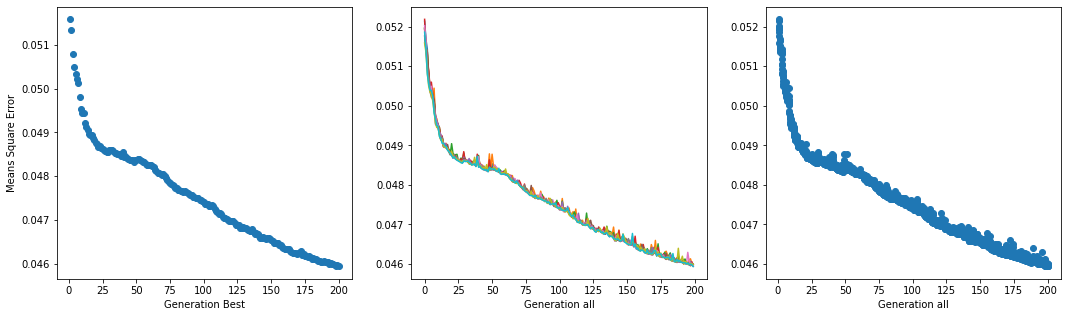

In [314]:
plot_3_window(generation_scores, best_scores)

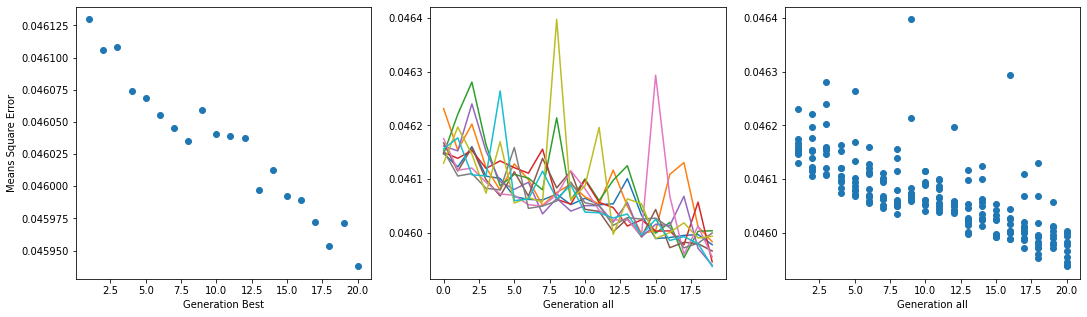

In [315]:
plot_3_window(generation_scores[-20:], best_scores[-20:])

In [316]:
# Na most kapcsoljuk be a keep_best = True

%%time
generation_scores, best_scores, best_mlp = evolve_adv2(mlp_dummy,
                                                       generation = 200,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 20),
                                                       random_factor=500)



best_score in generation i =  0  =  0.051919733869060146
best_score in generation i =  20  =  0.048712902174402606
best_score in generation i =  40  =  0.04836473643346176
best_score in generation i =  60  =  0.04805605782712151
best_score in generation i =  80  =  0.047814351138326466
best_score in generation i =  100  =  0.047568091698823256
best_score in generation i =  120  =  0.04727800280657227
best_score in generation i =  140  =  0.04698029443340552
best_score in generation i =  160  =  0.046722588909113114
best_score in generation i =  180  =  0.04634263687642255
CPU times: user 2.35 s, sys: 15.4 ms, total: 2.37 s
Wall time: 2.54 s


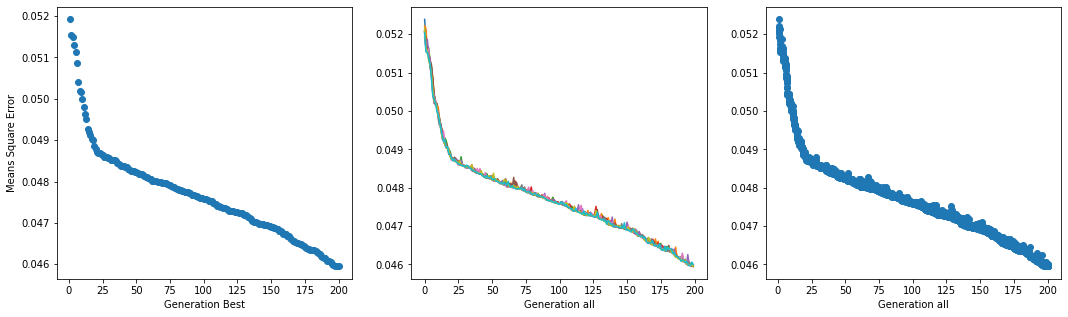

In [317]:
plot_3_window(generation_scores, best_scores)

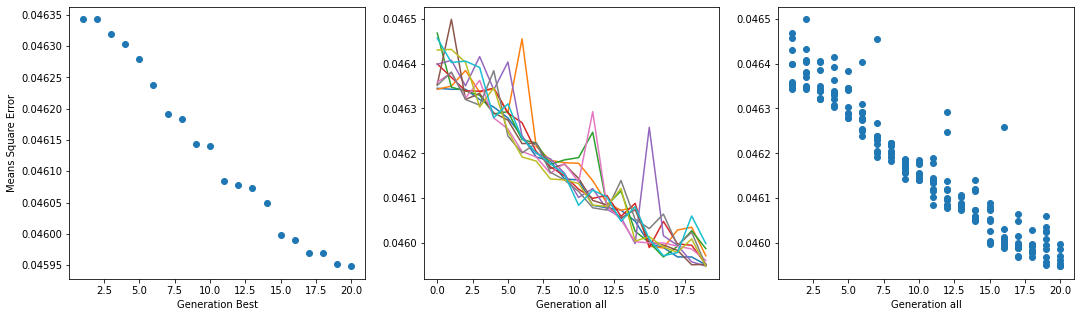

In [318]:
plot_3_window(generation_scores[-20:], best_scores[-20:])

# Fent

Bal felül: Mivel a keep_best be van kapcsolava, ezért mindíg megtartja a legjobbat és átviszi a következő generációra ezért rosszabb eredményt a következő generációban sem érthet el legfeljebb azonosat.

# Most

Futtassuk meg úgy, hogy nagyobbra veszem a mutációs rátát, **random_factor** és hasonlítsuk össze a két módszert.

In [323]:
# Keep Best --> False

%%time
generation_scores_kb_false, best_scores_kb_false, best_mlp_kb_false = evolve_adv2(mlp_dummy,
                                                       generation = 2000,
                                                       keep_best = False,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=100)



best_score in generation i =  0  =  0.05178770258267975
best_score in generation i =  200  =  0.044449786690856585
best_score in generation i =  400  =  0.04206794341775998
best_score in generation i =  600  =  0.04212712735095667
best_score in generation i =  800  =  0.04171763788779142
best_score in generation i =  1000  =  0.04206062875619764
best_score in generation i =  1200  =  0.04108114907886437
best_score in generation i =  1400  =  0.04235599854595065
best_score in generation i =  1600  =  0.04206283514792652
best_score in generation i =  1800  =  0.04312152834758042
CPU times: user 21.8 s, sys: 115 ms, total: 21.9 s
Wall time: 25.4 s


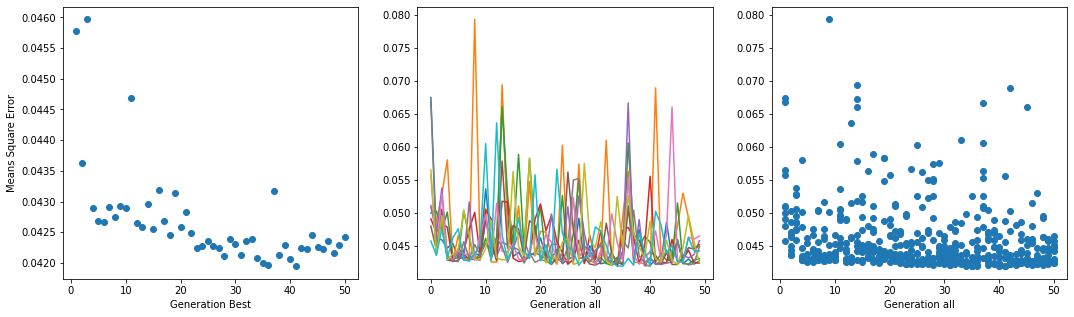

In [326]:
plot_3_window(generation_scores_kb_false[-50:], best_scores_kb_false[-50:])

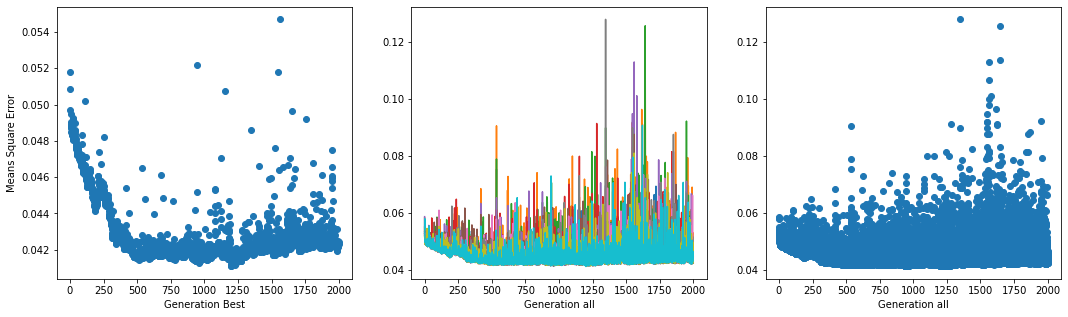

In [327]:
plot_3_window(generation_scores_kb_false, best_scores_kb_false)

In [324]:
# Keep Best --> True

%%time
generation_scores_kb_true, best_scores_kb_true, best_mlp_kb_true = evolve_adv2(mlp_dummy,
                                                       generation = 2000,
                                                       keep_best = True,
                                                       print_population=False,
                                                       print_generation=(True, 200),
                                                       random_factor=100)



best_score in generation i =  0  =  0.05067822884869143
best_score in generation i =  200  =  0.04297885073805384
best_score in generation i =  400  =  0.04125032640538007
best_score in generation i =  600  =  0.04070839870115626
best_score in generation i =  800  =  0.0395208849224951
best_score in generation i =  1000  =  0.03768434335104418
best_score in generation i =  1200  =  0.03234091780246085
best_score in generation i =  1400  =  0.030419228227210195
best_score in generation i =  1600  =  0.02937198800279629
best_score in generation i =  1800  =  0.02875356375433692
CPU times: user 21.9 s, sys: 153 ms, total: 22.1 s
Wall time: 26 s


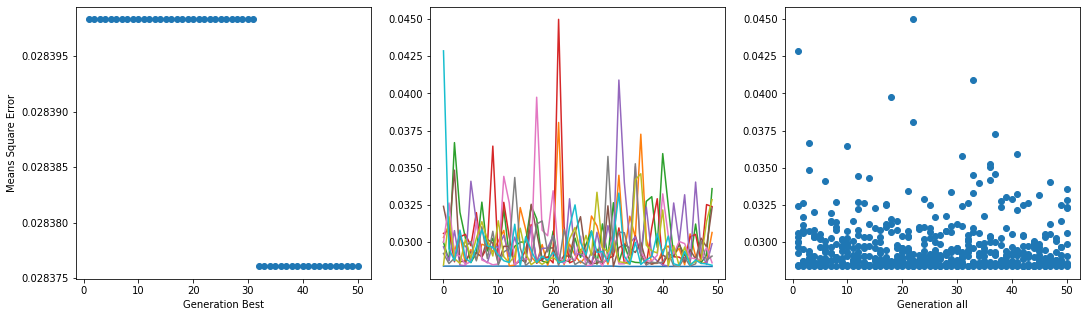

In [325]:
plot_3_window(generation_scores_kb_true[-50:], best_scores_kb_true[-50:])

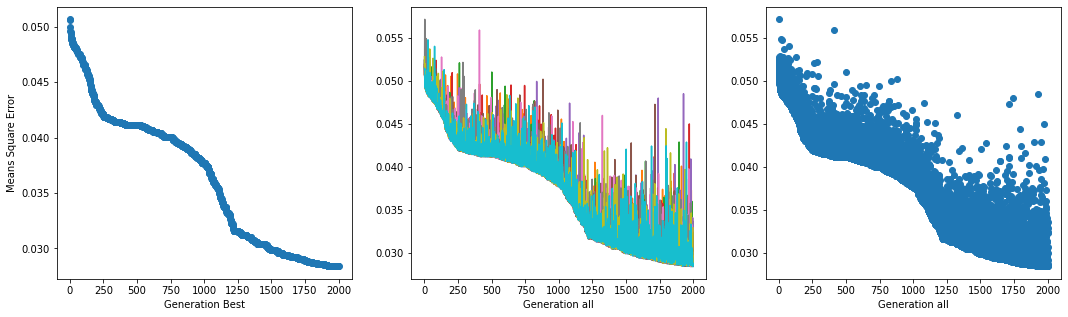

In [328]:
plot_3_window(generation_scores_kb_true, best_scores_kb_true)

# Fent

Annyi látszik (jobb oldali ábra) hogy ez még így is iszaonyatosan pazarló. Hiszen a megoldásoknak csak töredéke által jut el egy egy jobb megoldáshoz.

Viszont a keep_best miatt nincs visszalépés az egyes generációk között.

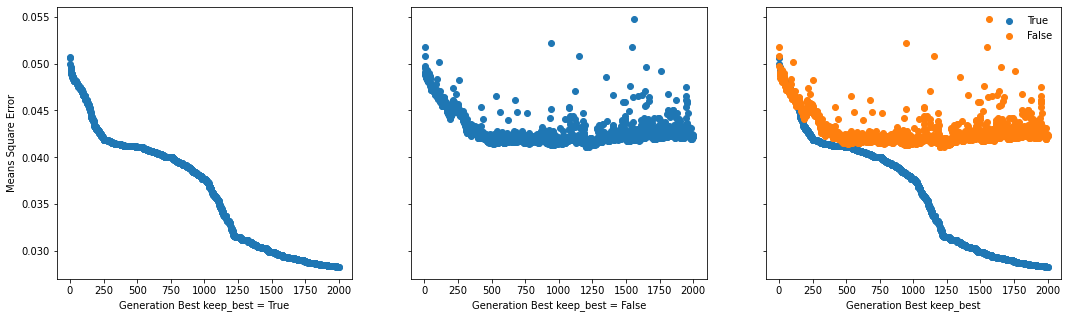

In [336]:

fig, (a0, a1, a2) = plt.subplots(1, 3, sharey=True, figsize=(18, 5))
_n = len(best_scores_kb_true)
_x_axis = np.arange(1, _n+1, 1)

a0.scatter(_x_axis, best_scores_kb_true)
a0.set_ylabel('Means Square Error')
a0.set_xlabel('Generation Best keep_best = True')

_n = len(best_scores_kb_false)
_x_axis = np.arange(1, _n+1, 1)

a1.scatter(_x_axis, best_scores_kb_false)
a1.set_xlabel('Generation Best keep_best = False')

a2.scatter(_x_axis, best_scores_kb_true, label = 'True')
a2.scatter(_x_axis, best_scores_kb_false, label = 'False')
a2.set_xlabel('Generation Best keep_best')
a2.legend(frameon=False)

plt.show()

# Játék a képpel

In [241]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [242]:
def int_show(rownumber):

  _y = img[rownumber, :]

  fig, (a0, a1) = plt.subplots(1, 2, figsize=(14, 3), gridspec_kw={'width_ratios': [3, 1]})
  a0.plot(_y, label = 'original')
  a0.legend(frameon=False)

  img_ = img.copy()
  img_[rownumber, :] = 1
  a1.imshow(img_, cmap='gray')
  a1.set_title('Gray')
  plt.show()

In [243]:
interact(int_show, rownumber=widgets.IntSlider(min=0, max=99, step=1, value=10));

interactive(children=(IntSlider(value=10, description='rownumber', max=99), Output()), _dom_classes=('widget-i…

# Ennél sokkal jobban járunk, ha

1. Evolúciós szelekcióval megkeressük a megfelelő paramétereket egy egyszerű neurális hálóban (esetleg néha rátanítunk a Gradiens módszerrel, aztán újra evolvájuk.

2. Soronként csinálunk egy Fourier Transformációt és a dominánks frekvenciák alapján, vagy a felső zaj levágásával rekonstruáljuk a sort, marjd ezeket összerakva ismét előállítjuk a képet

De ezeke már a következő notebookban.

<a href="https://github.com/JoDeMiro/DeepLearningIntroduction">Folytatás</a>

# Save and Load model

In [ ]:
import pickle

# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(mlp, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)



# Visualise net

[ 1 10 20  1]


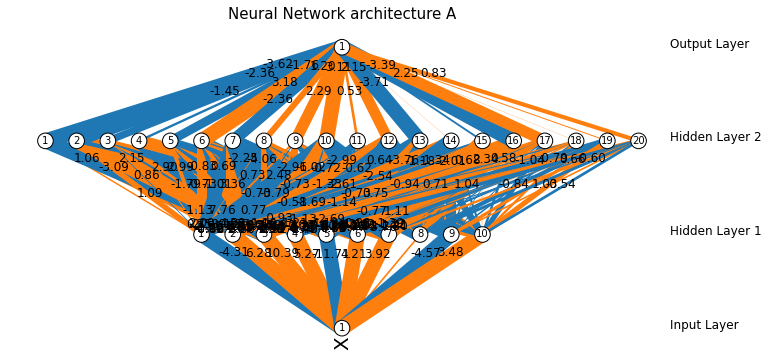

In [ ]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

num_input_varialbe = ['X']

# Define the structure of the network
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(mlp.hidden_layer_sizes), [1]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, mlp.coefs_, num_input_varialbe)
network.draw()



```
# JoDeMiro
```

